torch.Size([3, 224, 224]) 0
Follwing classes are there : 
 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Label : A


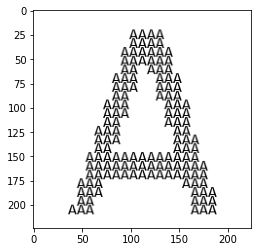

In [5]:
import os
import sys
sys.path.append("../")

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from torchvision import transforms
from torchvision.datasets import ImageFolder

import pandas as pd
import numpy as np
from PIL import Image

# https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48
import pandas as pd
from torchvision.io import read_image

#train and test data directory
data_dir = "./navon_letters_dataset_224/"
test_data_dir = "./navon_letters_dataset_224/"

#load the train and test data
dataset = ImageFolder(data_dir,transform = transforms.Compose([transforms.ToTensor()]))
test_dataset = ImageFolder(test_data_dir,transforms.Compose([transforms.ToTensor()]))


img, label = dataset[0]
print(img.shape,label)

print("Follwing classes are there : \n",dataset.classes)

def display_img(img,label):
    print(f"Label : {dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*dataset[0])

In [6]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

batch_size = 128
val_size = 2000
train_size = len(dataset) - val_size 

train_data,val_data = random_split(dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

#output
#Length of Train Data : 12034
#Length of Validation Data : 2000

#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_data, batch_size*2, num_workers = 4, pin_memory = True)

Length of Train Data : 1380
Length of Validation Data : 2000


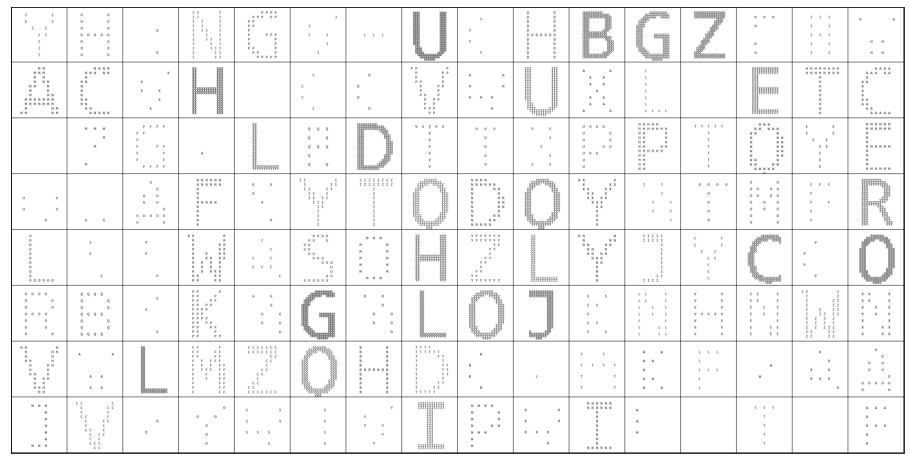

In [7]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dl)

In [8]:
import string
import keras
from keras.models import Sequential
"""Import from keras_preprocessing not from keras.preprocessing, 
because Keras may or maynot contain the features discussed here 
depending upon when you read this article, until the 
keras_preprocessed library is updated in Keras use the github version."""
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

df=pd.read_csv('./navon_letters_dataset_224/navon_letters_dataset_224_onehot.csv')
df = df[0:3380]
df['filename'] = df['filename'].astype(str)
df = df.fillna(0)
columns = []
columns[1:1] = list(string.ascii_uppercase)

datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

df_train = df.sample(frac=0.5, replace=False, random_state=42)
df_valid = df.drop(df_train.index)
df_valid = df.sample(frac=0.1, replace=False, random_state=43)
df_test = df.drop(df_train.index)
df_test = df.drop(df_valid.index)
df_test = df.sample(frac=0.1, replace=False, random_state=44)

train_generator=datagen.flow_from_dataframe(
    dataframe=df_train,
    directory="./",
    x_col="filename",
    y_col=columns,
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="raw",
    target_size=(224,224),
    color_mode="grayscale")

valid_generator=test_datagen.flow_from_dataframe(
    dataframe=df_valid,
    directory="./",
    x_col="filename",
    y_col=columns,
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="raw",
    target_size=(224,224),
    color_mode="grayscale")

test_generator=test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory="./",
    x_col="filename",
    batch_size=1,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(224,224),
    color_mode="grayscale")

2022-07-28 18:39:48.315985: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-28 18:39:48.316026: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Found 1690 validated image filenames.
Found 338 validated image filenames.
Found 338 validated image filenames.


In [9]:
model = Sequential()
model.add(Conv2D(224, (3, 3), padding='same',
                 input_shape=(224,224,1)))
model.add(Activation('relu'))
model.add(Conv2D(112, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(112, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(56, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(26, activation='softmax'))
model.compile(
    optimizers.Adam(learning_rate=0.0005),
    loss="binary_crossentropy",
    metrics=["accuracy"])

2022-07-28 18:39:50.405545: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-28 18:39:50.405596: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-28 18:39:50.405624: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (non-VirtualBox): /proc/driver/nvidia/version does not exist
2022-07-28 18:39:50.405933: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [ ]:
model.fit_generator(
    generator=train_generator, steps_per_epoch=None, epochs=25, verbose=1, callbacks=None,
    validation_data=None, validation_steps=None, validation_freq=1,
    class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    shuffle=True, initial_epoch=0
)

Epoch 1/25


/tmp/ipykernel_507404/2461209660.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


53/53 [==============================] - 437s 8s/step - loss: 0.2984 - accuracy: 0.0296
Epoch 2/25
53/53 [==============================] - 438s 8s/step - loss: 0.2770 - accuracy: 0.0479
Epoch 3/25
53/53 [==============================] - 438s 8s/step - loss: 0.2307 - accuracy: 0.3047
Epoch 4/25
53/53 [==============================] - 438s 8s/step - loss: 0.1652 - accuracy: 0.4367
Epoch 5/25
53/53 [==============================] - 438s 8s/step - loss: 0.1054 - accuracy: 0.4462
Epoch 6/25
53/53 [==============================] - 438s 8s/step - loss: 0.0658 - accuracy: 0.4586
Epoch 7/25
53/53 [==============================] - 439s 8s/step - loss: 0.0505 - accuracy: 0.4604
Epoch 8/25


In [34]:
from datetime import datetime

# datetime_now = datetime.datetime.now()
# datetime_now = str(datetime_now)[0:10]+"_"+str(datetime_now)[11:16].replace(":", "")

datetime_now = datetime.now().strftime('%Y%m%d_%H%M')
#model.save(f'./keras_model_224_{datetime_now}')
print('model saved as:', f'./keras_model_224_{datetime_now}')

model saved as: ./keras_model_224_20220728_1903


In [11]:
model = keras.models.load_model('./keras_model_224')

In [12]:
test_generator.reset()
pred=model.predict_generator(
    test_generator,
    steps=STEP_SIZE_TEST,
    verbose=1)

/tmp/ipykernel_508210/4021330056.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(


338/338 [==============================] - 54s 160ms/step


In [13]:
print(pred)
pred_bool = (pred > 0.5)

[[4.96192598e-09 1.26248179e-11 3.44408474e-10 ... 1.22478687e-13
  2.26966820e-10 1.16098325e-10]
 [3.13171162e-15 4.09906007e-12 3.56555280e-12 ... 9.99993443e-01
  3.00089923e-12 2.53536393e-11]
 [1.14966458e-16 1.12071429e-14 9.98796940e-01 ... 4.53813717e-17
  1.71753802e-14 2.26108720e-14]
 ...
 [3.04130969e-19 2.62110159e-20 3.60055752e-02 ... 8.41738971e-22
  9.22080702e-16 3.83106509e-18]
 [1.11021695e-27 1.23953209e-30 1.81618227e-32 ... 1.85835198e-24
  1.99164685e-30 1.07105967e-33]
 [8.13516806e-16 1.14518204e-13 3.94248349e-11 ... 1.12691020e-12
  1.07944027e-11 1.11713964e-14]]


In [15]:
predictions = pred
columns = []
columns[1:1] = list(string.ascii_uppercase)
# columns should be the same order of y_col
results=pd.DataFrame(predictions, columns=columns)
results["filename"]=test_generator.filenames
ordered_cols=["filename"]+columns
results=results[ordered_cols] # To get the same column order
results.to_csv(f"results_navon_cnn_keras_20220728.csv",index=False)

('X', 'U', '3') 
 X    0.999993
N    0.000005
Name: 1, dtype: float32
('C', 'J', '2') 
 C    0.998797
J    0.001203
Name: 2, dtype: float32
('M', 'V', '4') 
 M    0.999921
O    0.000070
Name: 3, dtype: float32
('D', 'H', '1') 
 D    0.908752
H    0.091248
Name: 4, dtype: float32


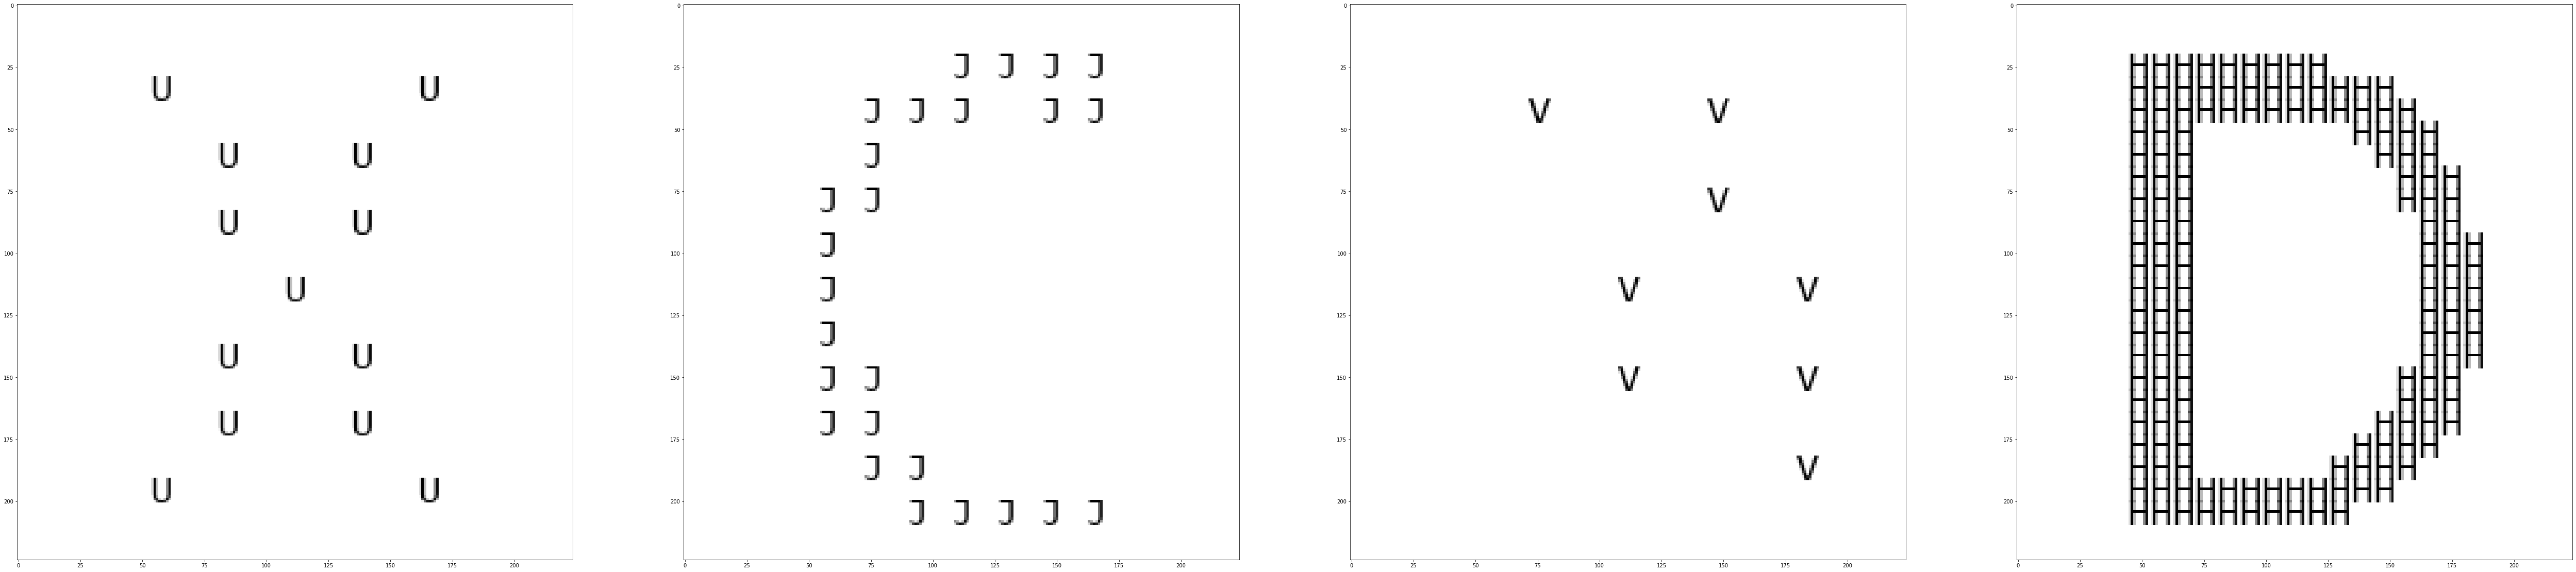

In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

fig = plt.figure(figsize=(112,112))
gs = fig.add_gridspec(1, 5)

def get_navon_params(i):
    img_filename = str(results['filename'].iloc[i])
    letter = img_filename.split("letter=")[1][0]
    fill_letter = img_filename.split("fill_letter=")[1][0]
    separation = img_filename.split("separation=")[1][0]
    return letter, fill_letter, separation

j = 1
for i in range(1, 5):
    print(get_navon_params(i), "\n",results[columns].iloc[i].sort_values(ascending=False)[0:2])
    img =  mpimg.imread(results['filename'].iloc[i])
    fig.add_subplot(gs[0, j])
    plt.imshow(img)
    j += 1

20220728_1902
